### Student Details

Student name: Elsa Anza Martín

Student ID: 21272708

# Task 1- Feature Selection

In this and the following task, you are going to use several areas of machine learning and data processing that you haven't used before. Up until now, we have mainly focused on classification. In this task, we will use the SVM to do ***regression***. Additionally, we will use the ***unsupervised learning algorithm***, principle components analysis, to do ***data compression***. 

You will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

We will use the [HITTERS dataset](https://rdrr.io/cran/ISLR/man/Hitters.html) which has some statistics of baseball players from the 1987/88 baseball season.

Our aim will be to use the available data to train an algorithm to predict the salary of a baseball player. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features 

The original hitters dataset has some empty entries in the salary column. So we have provided you the data with these samples with empty salary removed, we have randomly split into training and test data (using the 70-30 rule), and we have removed categorical features, which we haven't learned how to handle. For reference, we have also provided the original dataset.


### Hints

Hint 1: The standard scaler expects a column vector for the y samples, so use the `.reshape(-1,1)` functionality. However, the `SVR.fit` function expects a row vector, so use `.T[0]` to get the row vector from the column vector. Python is a wonderfully powerful computing language, but it is full of these stylistic inconsistencies.

Hint 2: In past e-tivities, we used `sklearn.metric`'s [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function. However, this only works for classification problems. Here we are dealing with a regression problem, where the output is a continuous variable rather than discrete labels. There are [many options of a score provided by `sklearn`](https://scikit-learn.org/stable/modules/model_evaluation.html), but we will pick one that is easy to interpret: the root-mean-squared-error. Use `sklearn.metric`'s [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), and set `squared=False`.

Hint 3: In the standard scaling, you need to apply scaling to training and test features (`X`). You also need to apply scaling to the `y` training data. However, when you run the `predict` function on new data, it will be per the scaled trained model. Therefore, to compare to the `y` test data, you need to invert the scaling, by calling the `inverse_transform` method.

In [1]:
# (given)
import pandas as pd
df_train = pd.read_csv('Hitters_train.csv', header=0)
df_test = pd.read_csv('Hitters_test.csv', header=0)

X_train = df_train.iloc[:, 1:17].values
y_train = df_train.iloc[:, 17].values
X_test = df_test.iloc[:, 1:17].values
y_test = df_test.iloc[:, 17].values

In [2]:
df_train

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,Kent Hrbek,550,147,29,85,91,71,6,2816,815,117,405,474,319,1218,104,10,1310.0
1,Steve Buechele,461,112,18,54,54,35,2,680,160,24,76,75,49,111,226,11,135.0
2,Terry Kennedy,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,920.0
3,Jim Presley,616,163,27,83,107,32,3,1437,377,65,181,227,82,110,308,15,200.0
4,Ken Landreaux,283,74,4,34,29,22,10,3919,1062,85,505,456,283,145,5,7,737.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Chris Bando,254,68,2,28,26,22,6,999,236,21,108,117,118,359,30,4,305.0
180,Ed Romero,233,49,2,41,23,18,8,1350,336,7,166,122,106,102,132,10,375.0
181,Howard Johnson,220,54,10,30,39,31,5,1185,299,40,145,154,128,50,136,20,297.5
182,Randy Bush,357,96,7,50,45,39,5,1394,344,43,178,192,136,167,2,4,300.0


### Part 1: Support Vector Regression

Here, we will use Support Vector Regression to predict the salary of baseball players, given a set of features. We will use a simple linear SVM regression, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. You need two scalers, for the X and the y. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Regression, using [`sklearn`'s `svm.SVR` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). All parameters can be left at default except `kernel='linear'`
1. Predict the salaries of the test data
1. Compare to the true salaries by plotting the predicted and the test values
1. Get the root mean squared error of the prediction using `sklearn.metrics`'s [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) as discussed above

You should see that the linear SVM regression isn't too bad. Maybe more often than not, it seems to underestimate the true wages of the very high earners. There can be several reasons for this, to do with the model, or possibly the features that we use don't capture things like overall fame of a player or earning capacity for a particular team. The aim isn't to investigate this, though.


In [3]:
from sklearn.preprocessing import StandardScaler

####################################

scaler = StandardScaler()
scaler2 = StandardScaler()
#train data to fit scaler, and applied to both traiing and testing data
scaler.fit(X_train)
X_train_StanSca = scaler.transform(X_train)
X_test_StanSca = scaler.transform(X_test)

scaler2.fit(y_train.reshape(-1,1))
y_train_StanSca = scaler2.transform(y_train.reshape(-1,1))
#y_test = scaler2.transform(y_test.reshape(-1,1))



In [4]:
X_test_StanSca

array([[ 0.43243296,  0.15651555,  1.06846094, ..., -1.05300813,
        -0.7935117 , -1.2600375 ],
       [-0.50415058, -0.69456903,  0.59757037, ...,  1.8199936 ,
        -0.20862657, -0.81842436],
       [-0.61598145, -0.78657817, -1.28599191, ..., -0.59000372,
         1.01492624,  0.50641507],
       ...,
       [-0.37834085, -0.07350731, -0.57965605, ..., -0.21801727,
        -0.41703392,  0.65361945],
       [-0.99341063, -0.83258274, -0.46193341, ..., -0.85118569,
        -0.43047955, -0.08240245],
       [-1.69235357, -1.43064218, -0.57965605, ..., -0.84327109,
        -0.20190375, -0.81842436]])

In [5]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train_StanSca, y_train_StanSca.T[0])
y_pred = svr.predict(X_test_StanSca)

In [6]:
y_pred = scaler2.inverse_transform(y_pred.reshape(1, -1))
y_pred

array([[ 672.75167134,  421.15806062,  168.27020397,  494.16348531,
         362.54991737,  468.13306513,  536.26539211,  469.71506466,
          89.61737258, 1175.70783356,  670.86450094,  201.8039721 ,
         468.89483119,  378.80543495,  719.80523624,  362.9552068 ,
         234.46570636,  236.66424369,  438.58997791,  280.92468408,
         702.81318487,  353.67991678,  341.93429335,  526.35691399,
        1093.9933091 ,  523.52852223,  794.44648537,  401.8717858 ,
         763.53063996,  582.0337316 ,  285.60092131,  204.16076649,
         847.78732246,  875.29730119,  -17.53392556, 1163.29120731,
        1162.79868914, 1311.29132067,  532.50202535,  208.65828241,
         935.680284  ,  464.9503953 ,  275.15863084, 1094.20668759,
         516.20148285, 1439.60746771,  376.7965951 ,  604.43759352,
        1727.75198912,  126.27756314,  737.03491493,  696.0377886 ,
        1129.51419625,  855.69194698,  738.87699487,  290.22578668,
        1167.54106742,  530.50571892,  141.47547

In [7]:
y_pred.reshape(-1, 1)

array([[ 672.75167134],
       [ 421.15806062],
       [ 168.27020397],
       [ 494.16348531],
       [ 362.54991737],
       [ 468.13306513],
       [ 536.26539211],
       [ 469.71506466],
       [  89.61737258],
       [1175.70783356],
       [ 670.86450094],
       [ 201.8039721 ],
       [ 468.89483119],
       [ 378.80543495],
       [ 719.80523624],
       [ 362.9552068 ],
       [ 234.46570636],
       [ 236.66424369],
       [ 438.58997791],
       [ 280.92468408],
       [ 702.81318487],
       [ 353.67991678],
       [ 341.93429335],
       [ 526.35691399],
       [1093.9933091 ],
       [ 523.52852223],
       [ 794.44648537],
       [ 401.8717858 ],
       [ 763.53063996],
       [ 582.0337316 ],
       [ 285.60092131],
       [ 204.16076649],
       [ 847.78732246],
       [ 875.29730119],
       [ -17.53392556],
       [1163.29120731],
       [1162.79868914],
       [1311.29132067],
       [ 532.50202535],
       [ 208.65828241],
       [ 935.680284  ],
       [ 464.950

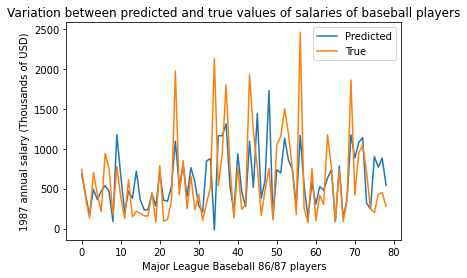

In [8]:
import matplotlib.pyplot as plt
x = list(range(len(y_pred.reshape(-1, 1))))
plt.plot(x, y_pred.reshape(-1, 1))
plt.plot(x, y_test)

plt.xlabel("Major League Baseball 86/87 players")
plt.ylabel("1987 annual salary (Thousands of USD)")
plt.legend(['Predicted', 'True'])
plt.title("Variation between predicted and true values of salaries of baseball players")
plt.show()

#### RMSE

In [9]:
y_pred = y_pred.reshape(-1, 1)

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

191092.39004586692

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the StandardScaler to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small value, such a `Years`, `HmRuns` and `Errors`. It is the nature of that data, and even though they may have a large influence on the salary of a player (see discussion at the end of this document), they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVR with the selected features and print the `mean_square_error`.
7. How does the `mean_square_error` compare to the the SVR with no features removed (from Part 1)?

In [11]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import numpy as np

####################################
X_train = df_train.iloc[:, 1:17].values
y_train = df_train.iloc[:, 17].values
X_test = df_test.iloc[:, 1:17].values
y_test = df_test.iloc[:, 17].values

In [12]:
scaler = MinMaxScaler()
#scaler2 = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMax = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler2.fit(y_train.reshape(-1,1))
#y_train = scaler2.transform(y_train.reshape(-1,1))

In [13]:
len(X_train[0])
#184 players
#16 features

16

# Tasks 2 and 3

In [14]:
import matplotlib.pyplot as plt


# Task 4

Fit the output of the MinMaxScaler using an object of sklearn.feature_selection's VarianceThreshold class using this threshold

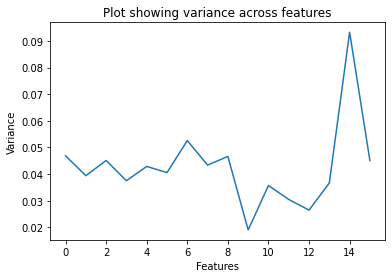

In [15]:
x= list(range(len(X_train_MinMax[0])))
variances = np.var(X_train_MinMax, axis=0)
plt.plot(x, variances)

plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Plot showing variance across features")

plt.show()

In [16]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0355)
X_train_thres = selector.fit_transform(X_train_MinMax)
X_train_thres

array([[0.80332829, 0.65296804, 0.725     , ..., 0.92272727, 0.21355236,
        0.3125    ],
       [0.66868381, 0.49315068, 0.45      , ..., 0.08409091, 0.46406571,
        0.34375   ],
       [0.        , 0.        , 0.025     , ..., 0.52424242, 0.14373717,
        0.25      ],
       ...,
       [0.30408472, 0.2283105 , 0.25      , ..., 0.03787879, 0.27926078,
        0.625     ],
       [0.51134644, 0.42009132, 0.175     , ..., 0.12651515, 0.00410678,
        0.125     ],
       [0.74583964, 0.57990868, 0.65      , ..., 0.09015152, 0.44353183,
        0.375     ]])

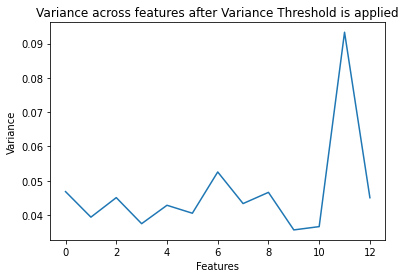

In [17]:
x= list(range(len(X_train_thres[0])))
variances = np.var(X_train_thres, axis=0)
plt.plot(x, variances)

plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance across features after Variance Threshold is applied")
plt.show()

In [18]:
variances

array([0.04685044, 0.03940667, 0.04509828, 0.03750432, 0.04286919,
       0.04054987, 0.05257365, 0.04336473, 0.04663321, 0.03568655,
       0.03664828, 0.09329093, 0.04506699])

In [19]:
np.var(X_train_MinMax, axis=0) #9, 11, 12 are the ones being dropped

array([0.04685044, 0.03940667, 0.04509828, 0.03750432, 0.04286919,
       0.04054987, 0.05257365, 0.04336473, 0.04663321, 0.01901254,
       0.03568655, 0.03045842, 0.02645251, 0.03664828, 0.09329093,
       0.04506699])

In [20]:
X_train_StanSca =  np.delete(X_train_StanSca, obj=np.s_[9:12] ,axis=1) #slicing 9 to 12, 12 not included.

In [21]:
X_test_StanSca =  np.delete(X_test_StanSca, obj=np.s_[9:12] ,axis=1)

In [22]:
len(X_train_StanSca[0]) #lenght becomes 13

13

# Task 5

transform the data that was scaled with the StandardScaler. This is an important step. Notice that we use the output of the MinMaxScaler to select the features, but the data we want to use is selected from the StandardScaler.

In [23]:
svr.fit(X_train_StanSca, y_train_StanSca.T[0])
y_pred = svr.predict(X_test_StanSca)

In [24]:
y_test

array([ 740.   ,  385.   ,  130.   ,  700.   ,  431.5  ,  210.   ,
        940.   ,  750.   ,  175.   ,  775.   ,  400.   ,  125.   ,
        612.5  ,  145.   ,  215.   ,  191.   ,  160.   ,  155.   ,
        450.   ,   80.   ,  787.5  ,   91.5  ,  115.   ,  350.   ,
       1975.   ,  425.   ,  850.   ,  250.   ,  657.   ,  235.   ,
        425.   ,  100.   ,  320.   ,  517.143, 2127.333,  535.   ,
        933.333, 1800.   ,  775.   ,  135.   ,  773.333,  240.   ,
        300.   , 1925.571, 1220.   ,  776.667,  165.   ,  480.   ,
        750.   ,  110.   , 1050.   , 1150.   , 1500.   , 1183.333,
        740.   ,  175.   , 2460.   ,  250.   ,   75.   ,  750.   ,
        100.   ,  416.667,  300.   , 1175.   ,  765.   ,   90.   ,
        740.   ,   90.   ,  350.   , 1861.46 ,  420.   ,  950.   ,
       1041.667,  708.333,  245.   ,  200.   ,  430.   ,  450.   ,
        275.   ])

In [25]:
y_pred = scaler2.inverse_transform(y_pred.reshape(1, -1))
y_pred

array([[ 698.12249234,  394.95653583,  141.46573466,  458.20291508,
         371.6136967 ,  458.24147329,  510.1398773 ,  520.93795196,
          66.34534057, 1245.45782681,  655.60694756,  202.53784644,
         458.87391765,  372.38925223,  702.77441533,  334.04093539,
         254.55430364,  230.17237546,  445.32262325,  269.53475323,
         704.00201965,  338.74636654,  328.99959964,  537.75213133,
        1110.49352965,  494.20299085,  825.11173689,  420.50082064,
         765.92656639,  578.30378097,  251.19645913,  185.73729946,
         978.52229968,  871.34223438,  -28.56643636, 1135.48570371,
        1056.11584741, 1400.55196225,  578.78647348,  183.61403903,
        1065.31188703,  443.19061755,  260.17165249, 1093.3440166 ,
         499.21446788, 1503.65636529,  373.22241434,  611.73769971,
        1696.94011125,  117.66165066,  783.87255958,  704.32979724,
        1149.08884074,  850.21241856,  767.95252459,  293.19882661,
        1149.05290643,  489.6832912 ,  134.08208

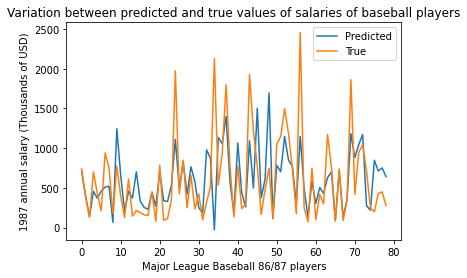

In [26]:
x = list(range(len(y_pred.reshape(-1, 1))))
plt.plot(x, y_pred.reshape(-1, 1))
plt.plot(x, y_test)

plt.xlabel("Major League Baseball 86/87 players")
plt.ylabel("1987 annual salary (Thousands of USD)")
plt.legend(['Predicted', 'True'])
plt.title("Variation between predicted and true values of salaries of baseball players")
plt.show()

In [27]:
mean_squared_error(y_test, y_pred.reshape(-1, 1))

190756.74413004512

###How does the mse compare?

Mean Square error decreases slightly, but a lot of computation time is gained from reducing the number of features with which we compute.

### Part 3: Univariate Feature Selection - `f_regression`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_regression` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), as we are doing a regression. The `f_regression` calculates the correlation between the predictor $\textbf{X}^{(i)}$ and the target $\textbf{y}$, i.e.:

\begin{equation}
\sum_j\frac{\left(\textbf{X}^{(i)}_j - \overline{\textbf{X}}^{(i)}\right)\left(\textbf{y}_j - \overline{\textbf{y}}\right)}{\sigma_{\textbf{X}^{(i)}} \sigma_{\textbf{y}}}
\end{equation}

This is then converted to an F-score and a p-value. These are statistical terms that you may be familar with from a statistics course, but are not part of this module. An intuitive, but not rigourous, way of thinking of this is: this score measures how much influence a feature $\textbf{X}^{(i)}$ has on the outcome $\textbf{y}$.

The `SelectKBest` functionality coupled with `f_regression`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 16)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) to pick the top `k` features from our dataset
3. Train a new SVM regression with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed
4. Use the `mean_squared_error` function to get the RMSE at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the RMSE versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" RMSE value compare with the SVM before removing any features? 

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

####################################
  
rootmean = []
mse_min = 600
for k in range(13):
  selector=SelectKBest(f_regression,k=k+1)
  X_train_new=selector.fit_transform(X_train_StanSca,y_train_StanSca.T[0])
  X_test_new = selector.transform(X_test_StanSca)
  svm= SVR(kernel='linear')
  svm.fit(X_train_new,y_train_StanSca.T[0])
  y_pred = scaler2.inverse_transform(svm.predict(X_test_new).reshape(-1,1)).T[0]
  rootmean.append(mean_squared_error(y_test, y_pred,squared=False))
  mse = mean_squared_error(y_test, y_pred,squared=False)
  if mse < mse_min:
    mse_min = mse
    k_msq_min = k+1

In [29]:
k_msq_min

13

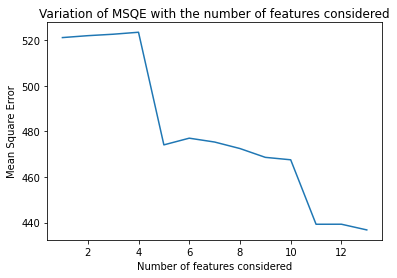

In [30]:
x = list(range(1, len(rootmean)+1))
plt.plot(x, rootmean)
plt.xlabel("Number of features considered")
plt.ylabel("Mean Square Error")
plt.title("Variation of MSQE with the number of features considered")
plt.show()

In [31]:
# probably 11 would be the best number to use since its an elbow point. 
# after this no significant reduction is appreciated.

### An aside: Correlation and causation

It is worth taking a moment to consider the famous correlation vs causation problem in the context of the task we have just completed.

Have a look at the plot below.

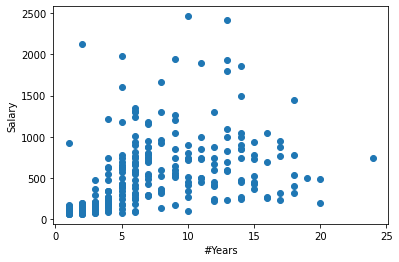

In [32]:
# given
import pandas as pd
df = pd.read_csv('Hitters_original.csv', header=0)
plt.scatter(df.iloc[:, 7], df.iloc[:, 19]);
plt.ylabel('Salary')
plt.xlabel('#Years')
plt.show()

There certainly seem to be some sort of correlation between the number of years playing and the salary that a player receives. It seems to increase (of course with outliers, as there are other influences), at least until 12 or 13 years in the game. Beyond that, the data is too sparse to really make a call, and maybe some players that are "past it" don't get a very high wage.

The fact that in our tasks above we chose `Years` as a feature does not mean, however, that the causal direction is from `Years` to `Salary`. That is, it does not mean that the number of years played actually causes a higher salary.There are, in fact, four options:
1. Number of years played *does* cause a higher salary. A hypothesis could be that the longer you play the game, the better you are at the game, and thus you get a higher salary
2. A higher salary causes a player to play for more years. A hypothesis could be that a player gets used to a nice, high salary, and then sticks around for longer on the high salary. Players on low salary are more likely to quit the game early.
3. An external influence causes both. A hypothesis could be that, good players enjoy fame. If you are famous, maybe you stick around for longer. And because you are famous, you make more money for your team in merchandise sales, so they pay you more money to make sure you stay with them, and not move to a competing team.
4. There is no causal relationship at all. The hypothesis is that all we are seeing is a statistical anomaly, and perhaps with more data we would realise that there is no relationship.

The point is, no machine learning model can infer causation. All supervised machine learning does is find correlations between a dataset of features and a corresponding set of ground truths. Whether a particular feature causes the output, or vice-versa, cannot be stated.

Feel free to discuss this type of topic in the forums.